<a href="https://colab.research.google.com/github/mellysekhan17/Assignment-3/blob/main/PYTN_Assgn_3_8_Mely_sekhan_kurniati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Panggil file (load file bernama bank-additional-full.csv) dan simpan dalam dataframe
df = pd.read_csv('bank-additional-full.csv', sep=';')
data = pd.DataFrame(df)

In [3]:
#Menampilkan 5 baris teratas pada data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Menampilkan 5 baris terbawah pada data
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
#Melihat jumlah baris dan jumlah kolom (bentuk data) pada data df dengan fungsi .shape 
data.shape

(41188, 21)

In [6]:
#Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#Mencari kolom pada data
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
#Mencari nilai unique pada data
for i in data.columns:
    print("\n", i)
    print(data[i].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

In [9]:
#Mengecek missing value
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#Mengecek data duplikat
data.duplicated().sum()

12

In [11]:
#Menghapus data duplikat
data.drop_duplicates(inplace=True)

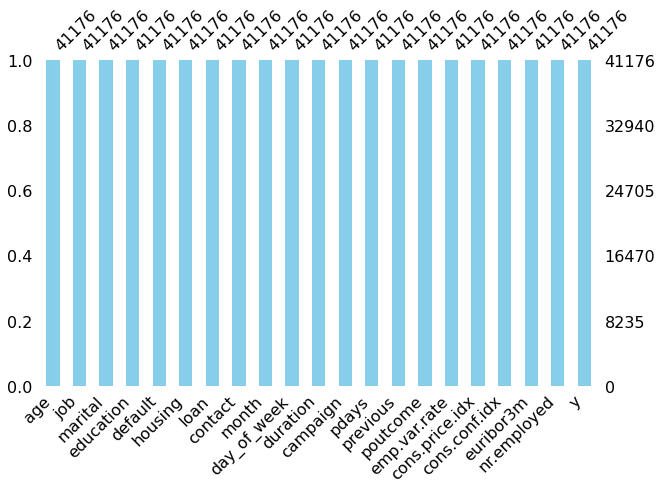

In [12]:
# cek missing values dengan visualisasi menggunakan library: Missingno adalah pustaka khusus untuk menampilkan missing value dalam bentuk barchart

import missingno as msno
msno.bar(data,figsize=(10,6),color='skyblue')
plt.show()

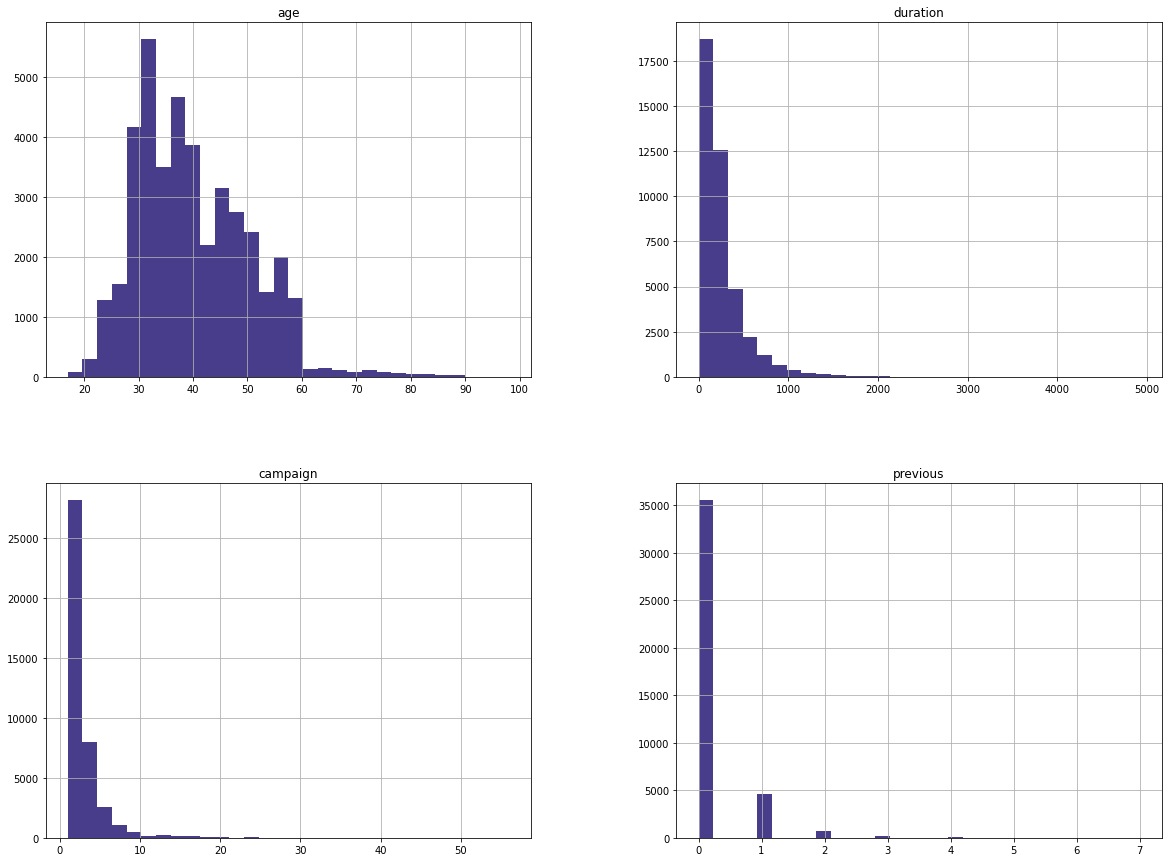

In [13]:
#Histogram pada kolom age, duration, campaign, dan previous
data[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15), color='darkslateblue')
plt.show()

In [14]:
#Membuat variabel kategori untuk menampung data dengan tipe data object dan boolean
kategori = data.select_dtypes(include=['object', 'bool']).columns.values

for col in kategori:
    print(col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


## Data Visualization

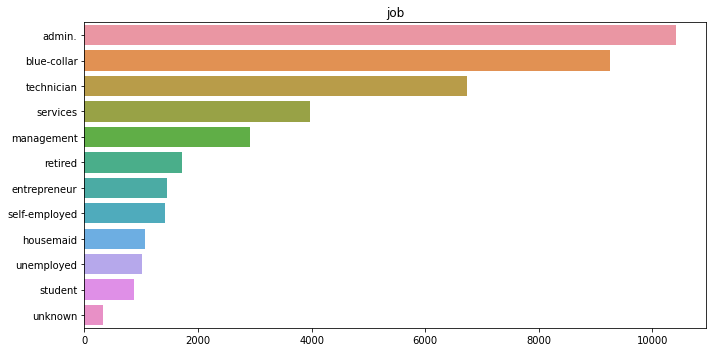

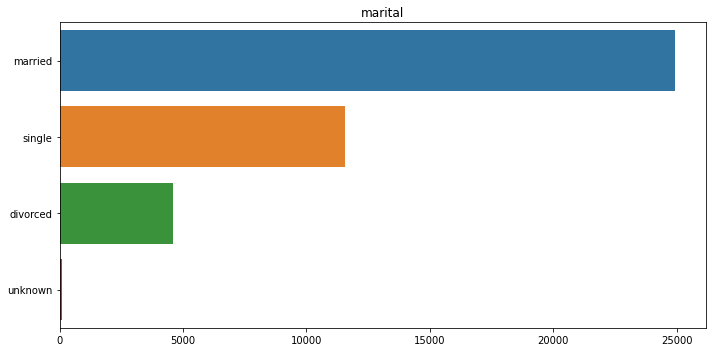

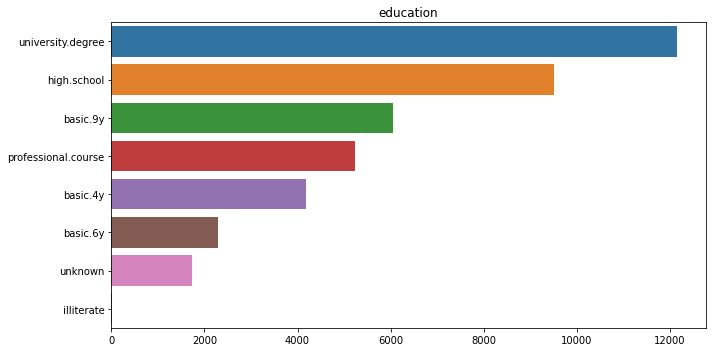

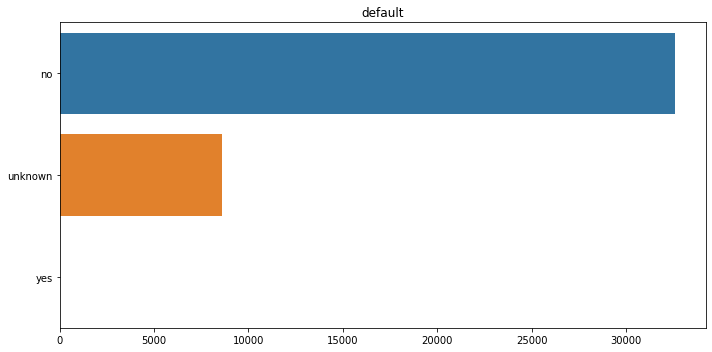

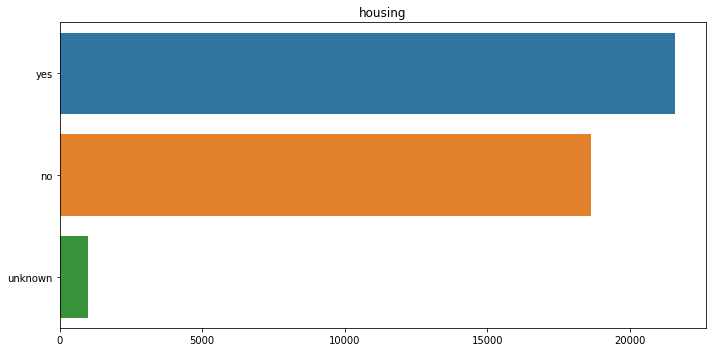

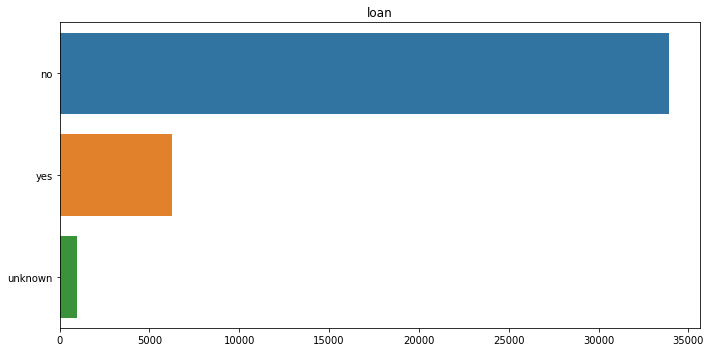

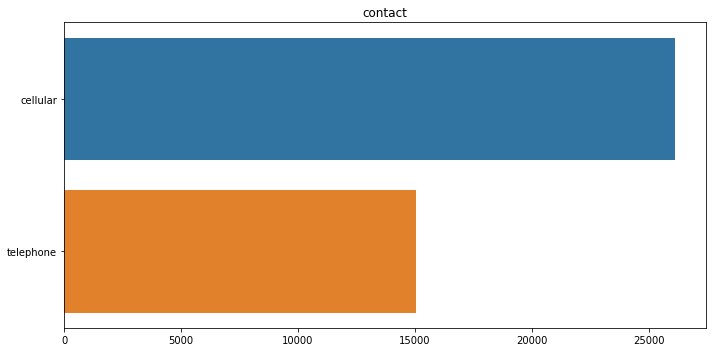

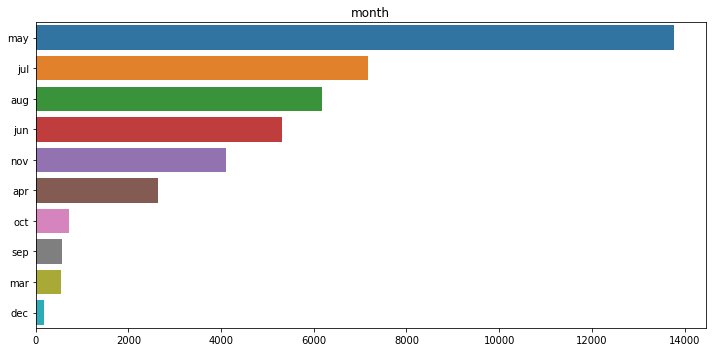

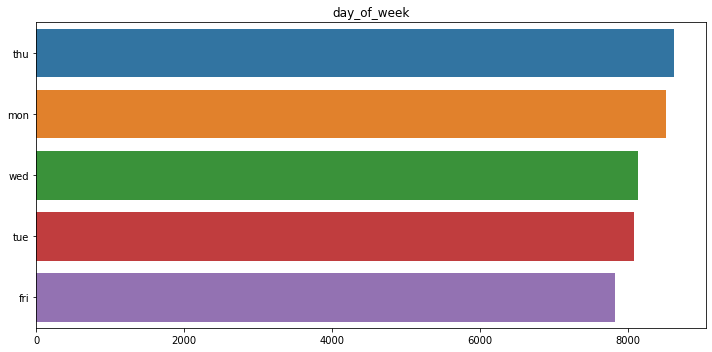

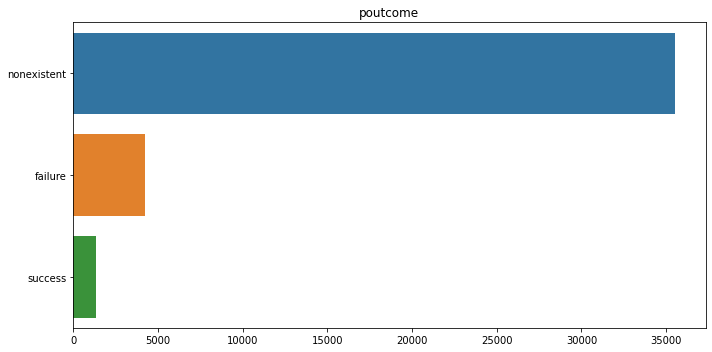

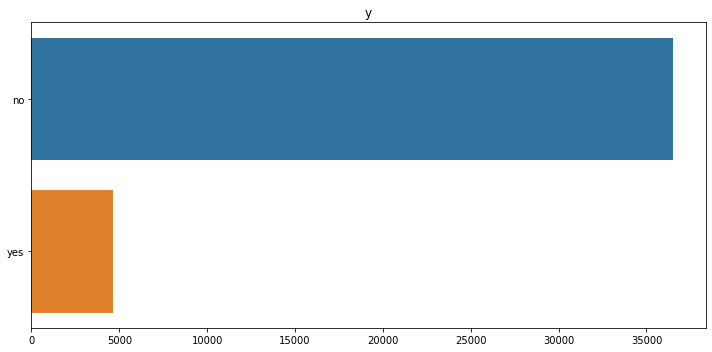

In [15]:
#Membuat barplot untuk variabel kategoris
for col in kategori:
    plt.figure(figsize=(10,5))    
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index, data=df)    
    plt.title(col)    
    plt.tight_layout()

**Kesimpulan:**

- Job: Audiens pada campaign ini sebagian besar menargetkan admin, blue-collar, dan technician.
- Marital: Kebanyakan dari mereka sudah menikah.
- Education: Sebagian besar nasabah memiliki tingkat pendidikan universitas sementara orang-orang yang buta huruf sangat kurang.
- Default/kredit: Kebanyakan orang tidak memiliki default tetap pada file kredit mereka.
- Housing: Kebanyakan orang tidak memiliki pinjaman perumahan.
- Loan: Kebanyakan orang tidak memiliki pinjaman pribadi.
- Contact: Sarana komunikasi yang umum adalah seluler.
- Month: Bulan May adalah bulan tersibuk dan Desember adalah bulan yang paling tidak sibuk.
- Day_of_week: Kamis adalah hari yang paling sibuk sedangkan Jumat adalah hari yang paling tidak sibuk dalam seminggu.
- Poutcome: Hasil dari pemasaran campaign sebelumnya paling banyak tidak ada dan paling sedikit yang berhasil.
- Y: Banyak nasabah yang belum/tidak berlangganan deposito berjangka.

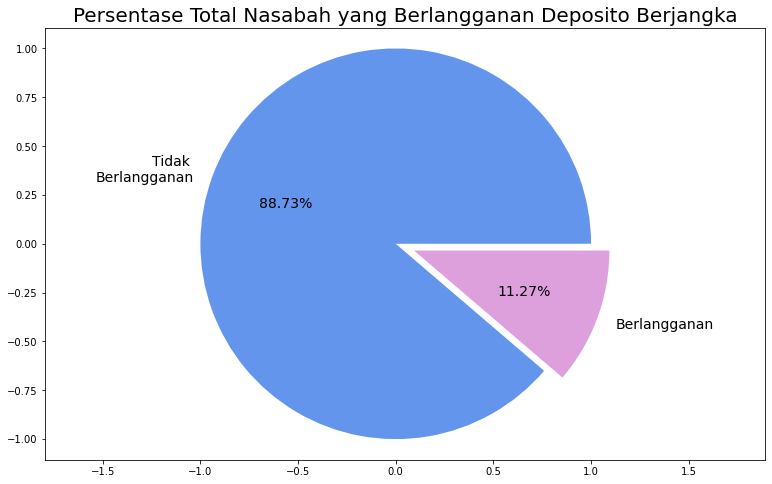

In [16]:
# Membuat pie chart untuk nasabah yang berlangganan deposito berjangka
mylabels = ["Tidak \nBerlangganan", "Berlangganan"]
mycolors = ["cornflowerblue", "plum"]
explode = (0, 0.1)
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data['y'].value_counts(), 
       labels = mylabels,
       colors = mycolors,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=14)) 

ax.axis('equal') 
plt.title('Persentase Total Nasabah yang Berlangganan Deposito Berjangka',
     color = 'black',
     fontsize = 20
     )

plt.show()

**Kesimpulan:**

Hasil dari persentase total nasabah yang berlangganan deposito berjangka sebesar 11.27% dan nasabah yang tidak berlangganan sebesar 88.73%.

In [17]:
#Membuat definisi cross_tab untuk EDA
def cross_tab(data,f1,f2):
    jobs=list(data[f1].unique())
    edu=list(data[f2].unique())
    dataframes=[]
    for i in edu:
        data_i=data[data[f2]==i]
        data_i_job=data_i.groupby(f1).count()[f2]
        dataframes.append(data_i_job)
    new_cross=pd.concat(dataframes,axis=1)
    new_cross.columns=edu
    new_cross=new_cross.fillna(0)
    return new_cross

In [18]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [19]:
#Mengisi data 'unknown' dengan data yang relevan
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [20]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [21]:
#Melihat cross_tab untuk variabel job dan housing
cross_tab(data,'job','housing')

,no,yes,unknown
job,,,
admin.,4634,5558,227
blue-collar,4361,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,787,908,44
self-employed,641,740,40
services,1817,2049,101
student,381,471,23


**Kesimpulan:**
<br>
Data di atas terlalu banyak data yang **unknown**, maka dari itu lebih baik data tersebut tidak diikut-sertakan.

In [22]:
#Tidak mengikutsertakan data yang bernilai unknown
data = data[data.housing != 'unknown']
data = data[data.loan != 'unknown']
data = data[data.default != 'unknown']
data = data[data.job != 'unknown']
data = data[data.marital != 'unknown']
data = data[data.education != 'unknown']

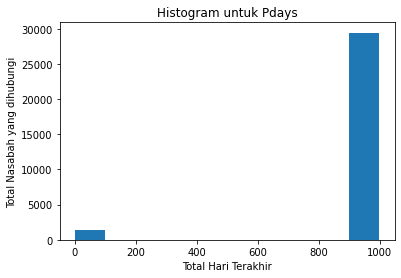

In [23]:
#Membuat histogram untuk pdays
plt.hist(data['pdays'])
plt.title('Histogram untuk Pdays')
plt.xlabel('Total Hari Terakhir')
plt.ylabel('Total Nasabah yang dihubungi')
plt.show()

**Kesimpulan:**
<br>
Dari histogram di atas, ada yang janggal dengan total hari terakhir untuk menghubungi nasabah. Dari keterangan di atas, nilai 999 berarti nasabah sebelumnya tidak dihubungi. Maka dari itu, nilai tersebut diubah menjadi variabel kategori.

In [24]:
#
data['pdays_missing'] = 0
data['pdays_less_5'] = 0
data['pdays_greater_15'] = 0
data['pdays_bet_5_15'] = 0
data['pdays_missing'][df['pdays']==999] = 1
data['pdays_less_5'][df['pdays']<5] = 1
data['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
data['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

### Encode Data

In [25]:
#Encode variabel kategori dengan encoder label
kategoris = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for cols in kategoris:
    data[cols] = label_encoder.fit_transform(data[cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


## Defining Model

In [26]:
train,test = train_test_split(data,test_size = 0.30 ,random_state = 350)
    
#Memisahkan variabel dependen dan independen pada data training dan testing
X_train = train.drop(labels='y',axis=1)
y_train = train['y']
X_test  = test.drop(labels='y',axis=1)
y_test  = test['y']


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Data Modeling

### Logistic Regression

In [27]:
#Membuat model logistic regression
logreg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=50)
logreg.fit(X_train, y_train)

#Menguji dataset
X_test = scaler.transform(X_test)

#Memprediksi output
y_pred = logreg.predict(X_test)

# summary model
print('\n\n')
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8095
           1       0.66      0.44      0.53      1140

    accuracy                           0.90      9235
   macro avg       0.79      0.70      0.74      9235
weighted avg       0.89      0.90      0.89      9235



In [28]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7839  256]
 [ 643  497]]


In [29]:
#Akurasi dari Logistic Regression
print('Akurasi untuk Logistic Regression:', logreg.score(X_test, y_test))

Akurasi untuk Logistic Regression: 0.902652950730915


### K-Nearest Neighbors

In [30]:
#Membuat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=50)

# Train model menggunakan training set
knn.fit(X_train, y_train)

# Memprediksi respon/output
y_pred1 = knn.predict(X_test)

In [31]:
#Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[7880  215]
 [ 770  370]]


In [32]:
#Akurasi dari K-Nearest Neighbors
print("Akurasi untuk K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))

Akurasi untuk K-Nearest Neighbors: 0.8933405522468868


### Support Vector Machine

In [33]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(X_train, y_train) 

# Predict the response for test dataset
y_pred2 = svm_model.predict(X_test)

In [34]:
#Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[7870  225]
 [ 762  378]]


In [35]:
#Akurasi dari Support Vector Machine
print("Akurasi untuk Support Vector Machine:", metrics.accuracy_score(y_test, y_pred2))

Akurasi untuk Support Vector Machine: 0.8931239848402815


### Decision Tree Classifier

In [36]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

# Predict the response for test dataset
y_pred3 = dtc.predict(X_test)

In [37]:
#Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[7710  385]
 [ 507  633]]


In [38]:
#Akurasi dari Decision Tree
print("Akurasi untuk Decision Tree:",metrics.accuracy_score(y_test, y_pred3))

Akurasi untuk Decision Tree: 0.9034109366540336


### Random Forest Classifier

In [39]:
#Membuat model Random Forest
rfc = RandomForestClassifier(n_estimators=100)
 
# Train the model using the training
rfc.fit(X_train,y_train) 

y_pred4 = rfc.predict(X_test)

In [40]:
#Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[7781  314]
 [ 575  565]]


In [41]:
#Akurasi untuk Random Forest
print("Akurasi untuk Random Forest:",metrics.accuracy_score(y_test, y_pred4))

Akurasi untuk Random Forest: 0.9037357877639415


### Naive Bayes

In [42]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred5 = gnb.predict(X_test)

In [43]:
#Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[5369 2726]
 [ 175  965]]


In [44]:
#Akurasi dari Naive Bayes
print("Akurasi untuk Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Akurasi untuk Naive Bayes: 0.6858689767190038


## Model Evaluation

In [45]:
#Kumpulan akurasi:
print("Berikut adalah akurasi dari berbagai macam model:")
print("Logistic Regression:",metrics.accuracy_score(y_test, y_pred))
print("K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))
print("Support Vector Machine:",metrics.accuracy_score(y_test, y_pred2))
print("Decision Tree:",metrics.accuracy_score(y_test, y_pred3))
print("Random Forest:",metrics.accuracy_score(y_test, y_pred4))
print("Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Berikut adalah akurasi dari berbagai macam model:
Logistic Regression: 0.902652950730915
K-Nearest Neighbors: 0.8933405522468868
Support Vector Machine: 0.8931239848402815
Decision Tree: 0.9034109366540336
Random Forest: 0.9037357877639415
Naive Bayes: 0.6858689767190038


## Kesimpulan

Dari hasil analisis di atas, dapat diketahui bahwa model Random Forest memiliki akurasi tertinggi. Sehingga model Random Forest tepat digunakan untuk memprediksi nasabah bank di masa depan.